In [28]:
from main import *
import seaborn as sns

In [20]:
parameters = {
    'a_const': 1,
    'b_const': 2,
    'c_const': -3,
    'd_const': 2,
    'l': np.pi / 2,
    'function': lambda: 0,
    'alpha': 1,
    'beta': 0,
    'gamma': 1,
    'delta': 0,
    'psi1': lambda x: np.exp(-x) * np.cos(x),
    'psi2': lambda x: -np.exp(-x) * np.cos(x),
    'psi11': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
    'psi12': lambda x:  2 * np.exp(-x) * np.sin(x),
    'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
    'phi_l': lambda t: 0,
    'type': '1-2',
    'accuracy_level': 1,
    'analytical_solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    'algorithm': 'Implicit'
}

Ввод данных

In [22]:
N = int(input()) # 15

In [23]:
K = int(input()) # 750

In [24]:
T = int(input()) # 70

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}
Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

In [25]:
algorithms = ('Explicit', 'Implicit')
answers = dict()
solver = HyperbolicSolver(parameters)
analytic = solver.analytical_solution_matrix(N, K, T)
answers['Analytic'] = analytic
for algorithm in algorithms:
    parameters['algorithm'] = algorithm
    solver = HyperbolicSolver(parameters)
    numeric = solver.solve(N, K, T)
    answers[algorithm] = numeric

def calculate_error(numeric_data, analytic_data):
    error_list = []
    error_values = [[abs(i - j) for i, j in zip(x, y)] for x, y in zip(numeric_data, analytic_data)]
    for i in range(len(error_values)):
        tmp = 0
        for j in error_values[i]:
            tmp += j
        error_list.append(tmp / len(error_values[i]))
    return error_list

График U(x)

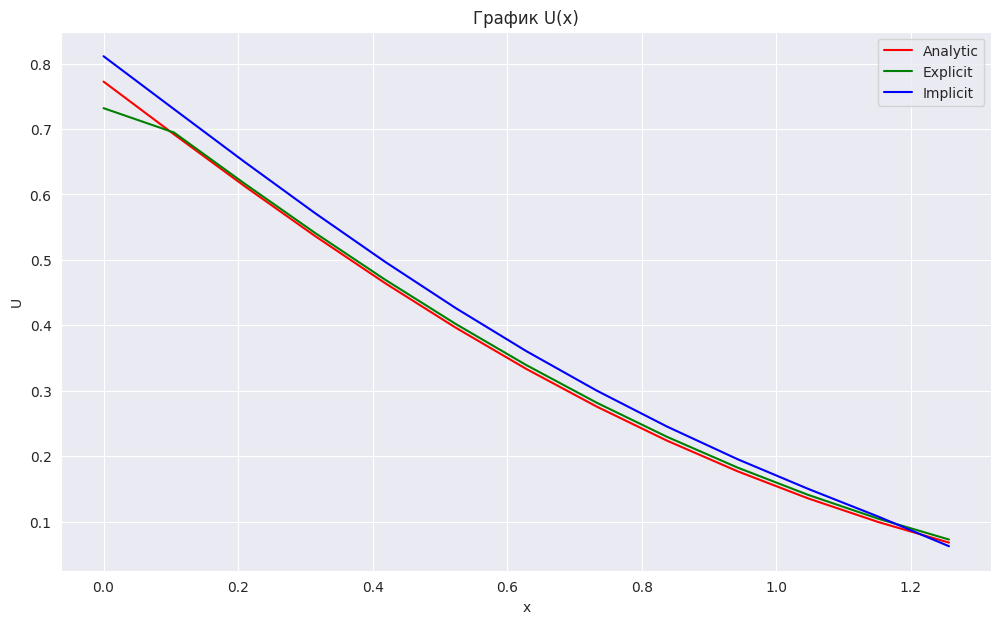

In [29]:
def plot_u_x(data_dict, N, K, T, time=2):
    plt.figure(figsize=(12,7))
    x_values = np.arange(0, np.pi / 2, np.pi / 2 / N)
    time_values = np.arange(0, T, T / K)
    analytic_values = np.array(data_dict['Analytic'])
    explicit_values = np.array(data_dict['Explicit'])
    implicit_values = np.array(data_dict['Implicit'])
    
    plt.title('График U(x)')
    plt.plot(x_values[0:-2], analytic_values[time][0:-2], color='r', label='Analytic')
    plt.plot(x_values[0:-2], explicit_values[time][0:-2], color='g', label='Explicit')
    plt.plot(x_values[0:-2], implicit_values[time][0:-2], color='b', label='Implicit')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.grid(True)

sns.set_style("darkgrid")
plot_u_x(answers, N, K, T)

График ошибок от времени

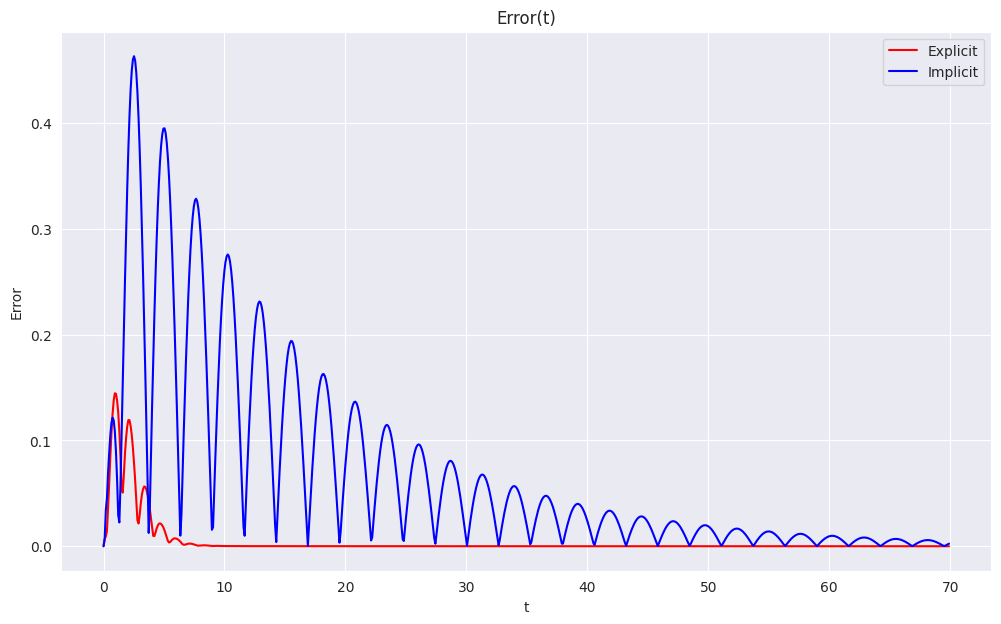

In [31]:
def plot_errors(data_dict, N, K, T, time=2):
    plt.figure(figsize=(12,7))
    time_values = np.arange(0, T, T / K)

    colors = ['red', 'b']
  
    plt.title('Error(t)')
    for method, color in zip(algorithms, colors):
        plt.plot(time_values, calculate_error(data_dict[method], data_dict['Analytic']), label=method, color=color)
    plt.legend(loc='best')
    plt.ylabel('Error')
    plt.xlabel('t')
    plt.grid(True)
    plt.show()

sns.set_style("darkgrid")
plot_errors(answers, N, K, T)